<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Using TensorFlow backend.


In [3]:
print('train_images', type(train_images), train_images.shape, train_images.dtype)
print('train_labels', type(train_labels), train_labels.shape, train_labels.dtype)
print('test_images', type(test_images), test_images.shape, test_images.dtype)
print('test_labels', type(test_labels), test_labels.shape, test_labels.dtype)

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


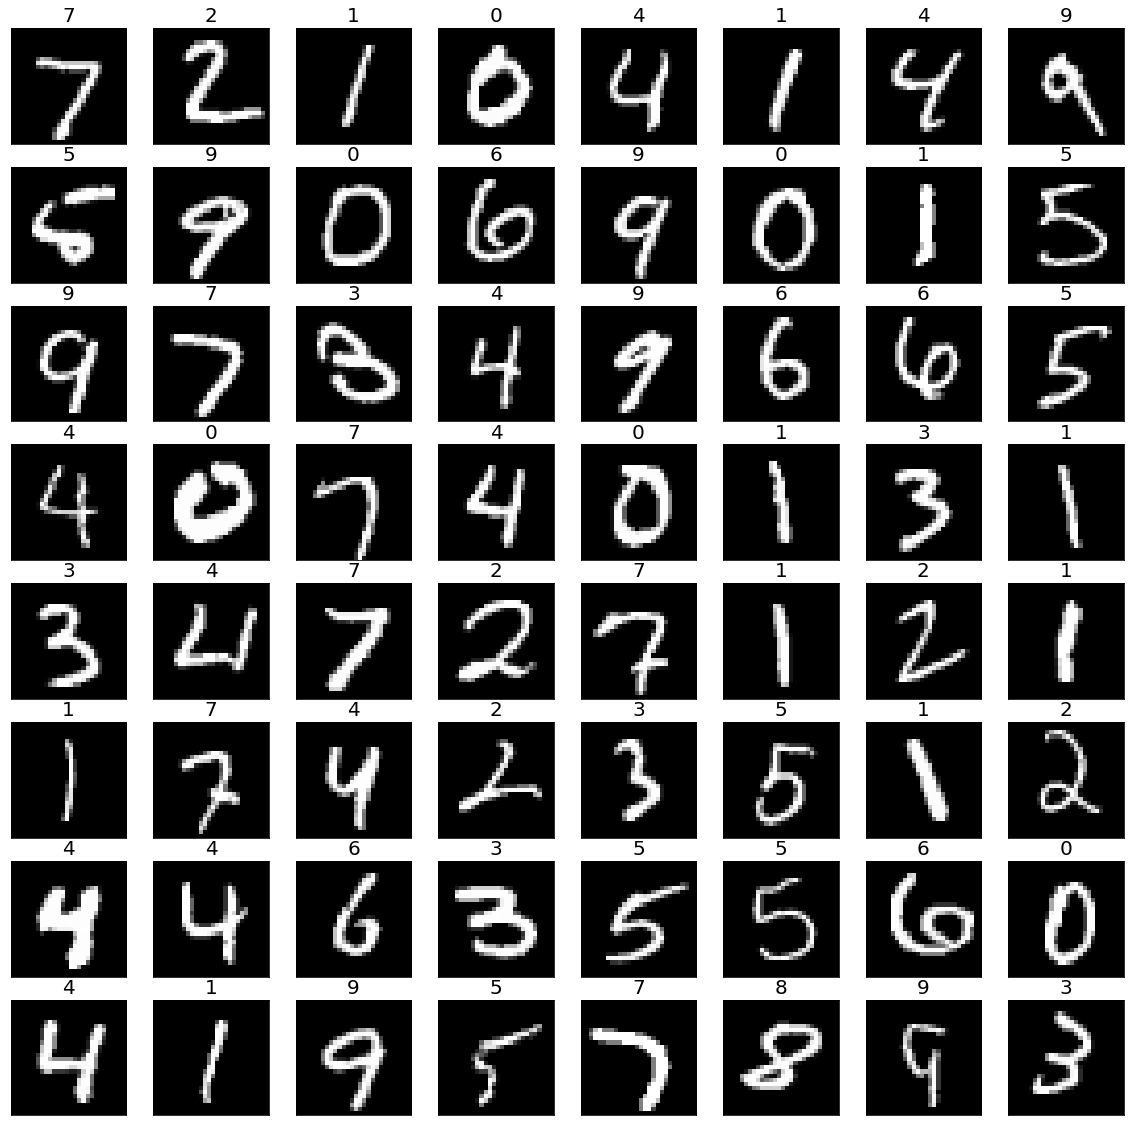

In [5]:
plt.figure(figsize=(20,20))
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)   # subplot index는 1부터 시작함
    plt.xticks([])
    plt.yticks([])
    plt.title("{}".format(test_labels[i]), {'fontsize': 20})
    plt.imshow(test_images[i], cmap='gray')

In [10]:
_, h, w = train_images.shape
train_x = (train_images.reshape(-1, h*w) / 255).astype('float32')
test_x = (test_images.reshape(-1, h*w) / 255).astype(np.float32)
print('train_x:', type(train_x), train_x.shape, train_x.dtype)
print('test_x:', type(test_x), test_x.shape, test_x.dtype)

train_x: <class 'numpy.ndarray'> (60000, 784) float32
test_x: <class 'numpy.ndarray'> (10000, 784) float32


In [16]:
num_classes = 10
print('test_labels:', test_labels.shape, test_labels.dtype)
print('test_labels[0]=', test_labels[0])

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)
print('test_y:', test_y.shape, test_y.dtype)
print('test_y[0]', test_y[0])

test_labels: (10000,) uint8
test_labels[0]= 7
test_y: (10000, 10) float32
test_y[0] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [18]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(h*w,)))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- $softmax = \Large \frac {e^{x}}{\Sigma_{j=1}^{10} e^{x_j}}$